# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings("ignore")

# Specify Desired Dates

In [3]:
"""
start_date & end_date parameters are provided in "dd-mm-YYYY" format.

"""
start_date_1 = '01-01-2022'
end_date_1 = '31-12-2022'


start_date_2 = '01-01-2024'
end_date_2 = '30-12-2024'


start_date='01-01-2021'
end_date = '01-03-2025'
"""
actual_graph_date parameter is provided in "YYYY-mm-dd" format.

"""

actual_graph_date = '2024-05-01'

save_time_series = True

# Specify APIs

In [4]:
api_mcp = 'http://10.7.32.34/cdm/Quotations/GetRData/6df0b5ef-51b4-4941-b319-bd86d343060d?startDate='+start_date+'&endDate='+end_date+'&dates=true&simulation=0&timeZone=CEST'

In [5]:
api_eua = 'http://10.7.32.34/cdm/Quotations/GetRData/4812f260-217b-4827-ba42-ab933666adaf?startDate='+start_date+'&endDate='+end_date+'&dates=true&simulation=0'

In [6]:
api_brent = 'http://10.7.32.34/cdm/Quotations/GetRData/dd1a744d-4bbe-47d7-a2c3-aabf2326f4fe?startDate='+start_date+'&endDate='+end_date+'&dates=true&simulation=0'

In [7]:
api_ttf = 'http://10.7.32.34/cdm/Quotations/GetRData/a2e59b6b-8768-4b11-8c57-b86c402fec9a?startDate='+start_date+'&endDate='+end_date+'&dates=true&simulation=0'

# Functionalities

In [8]:
def calculate_instances(df: pd.DataFrame, price_col: str = 'EUA', window_calc: int = 70):
    df['log_returns'] = np.log(df[price_col] / df[price_col].shift(1))
    df['volatility'] = df['log_returns'].rolling(window=window_calc, closed='both').std(ddof=1)
    
    return df

In [9]:
def load_and_edit_data(api_str: str = None, new_col: str = 'EUA'):
    df = pd.read_csv(api_str)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', drop=True, inplace=True)
    df.index = df.index.strftime('%Y-%m-%d')
    df.index.name = None
    df.index = pd.to_datetime(df.index)
    df.columns = [new_col]

    return df

In [10]:
def to_percent(y, _):
    return f"{y*100:.1f}%"

# Load Data

In [11]:
df_mcp = load_and_edit_data(api_str=api_mcp, new_col='MCP').dropna()

#df_mcp.loc['2020-10-29']

In [12]:
#df_mcp

In [13]:
df_eua = load_and_edit_data(api_str=api_eua, new_col='EUA').dropna()

In [14]:
df_brent = load_and_edit_data(api_str=api_brent, new_col='BR').dropna()

In [15]:
df_ttf = load_and_edit_data(api_str=api_ttf, new_col='TTF').dropna()

In [16]:
# df_mcp.to_csv('mcp_test.csv')
# df_eua.to_csv('eua_test.csv')
# df_brent.to_csv('brent_test.csv')
# df_ttf.to_csv('ttf_test.csv')

# Calculate Log Daily Returns & Volatility

In [17]:
df_mcp_full = calculate_instances(df=df_mcp, price_col="MCP")
df_eua_full = calculate_instances(df=df_eua, price_col="EUA")
df_brent_full = calculate_instances(df=df_brent, price_col="BR")
df_ttf_full = calculate_instances(df=df_ttf, price_col="TTF")

# Create Plots

In [18]:

df_ttf_full_1 = df_ttf_full.loc[start_date_1:end_date_1].copy()
df_ttf_full_1['month'] = df_ttf_full_1.index.month_name()


df_ttf_full_2 = df_ttf_full.loc[start_date_2:end_date_2].copy()
df_ttf_full_2['month'] = df_ttf_full_2.index.month_name()


df_mcp_full_1 = df_mcp_full.loc[start_date_1:end_date_1].copy()
df_mcp_full_1['month'] = df_mcp_full_1.index.month_name()

df_mcp_full_2 = df_mcp_full.loc[start_date_2:end_date_2].copy()
df_mcp_full_2['month'] = df_mcp_full_2.index.month_name()


df_mcp_full_1.index = df_mcp_full_2.index.copy()
df_ttf_full_1.index = df_ttf_full_2.index.copy()

In [19]:
###############################################################

In [20]:
# df_ttf_full_1.reset_index(inplace=True, drop=True)

# df_ttf_full_2.reset_index(inplace=True, drop=True)

# df_mcp_full_1.reset_index(inplace=True, drop=True)

# df_mcp_full_2.reset_index(inplace=True, drop=True)

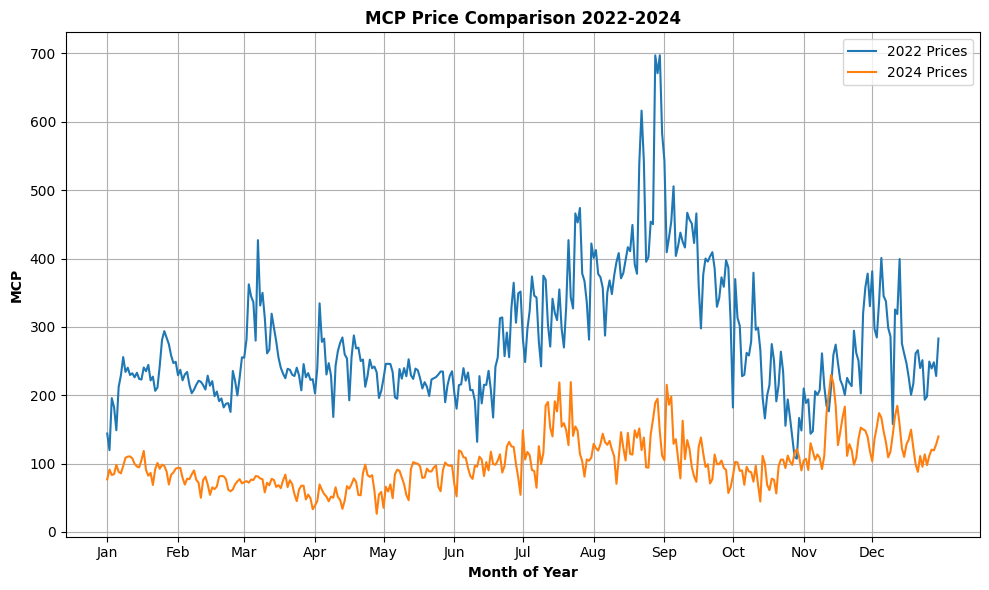

In [21]:
plt.figure(figsize=(10,6))

plt.plot(df_mcp_full_1['MCP'], label='2022 Prices')
plt.plot(df_mcp_full_2['MCP'], label = '2024 Prices')

# plt.xticks(['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

#plt.xticks(ticks=df_mcp_full_1['month'], labels=df_mcp_full_1['month'])



plt.legend()
plt.grid()

# Set 12 evenly spaced ticks on the x-axis
#tick_positions = np.linspace(0, 350, 12)
#plt.xticks()

#plt.xticks(ticks=tick_positions)
#plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

month_starts = pd.date_range(start=df_mcp_full_1.index.min(), end=df_mcp_full_1.index.max(), freq='MS')
month_labels = month_starts.strftime('%b')
plt.xticks(ticks=month_starts, labels=month_labels)


plt.title("MCP Price Comparison 2022-2024", fontweight="bold")
plt.ylabel("MCP", fontweight="bold")
plt.xlabel("Month of Year", fontweight="bold")
plt.tight_layout()
plt.show()

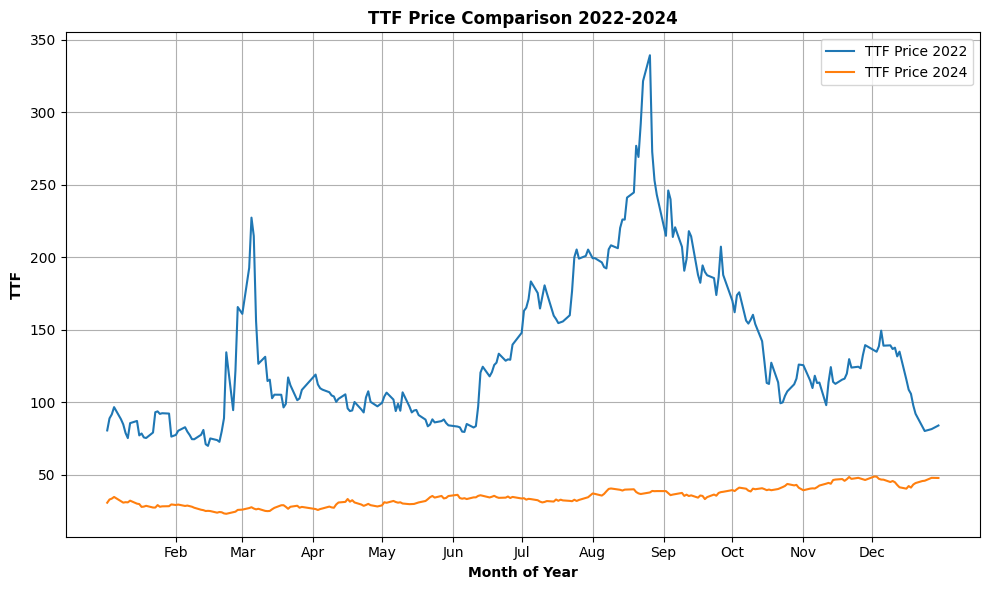

In [22]:
plt.figure(figsize=(10,6))

plt.plot(df_ttf_full_1['TTF'], label="TTF Price 2022")
plt.plot(df_ttf_full_2['TTF'], label="TTF Price 2024")



month_starts = pd.date_range(start=df_ttf_full_1.index.min(), end=df_ttf_full_1.index.max(), freq='MS')
month_labels = month_starts.strftime('%b')
plt.xticks(ticks=month_starts, labels=month_labels)


plt.title("TTF Price Comparison 2022-2024", fontweight="bold")
plt.ylabel("TTF", fontweight="bold")
plt.xlabel("Month of Year", fontweight="bold")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

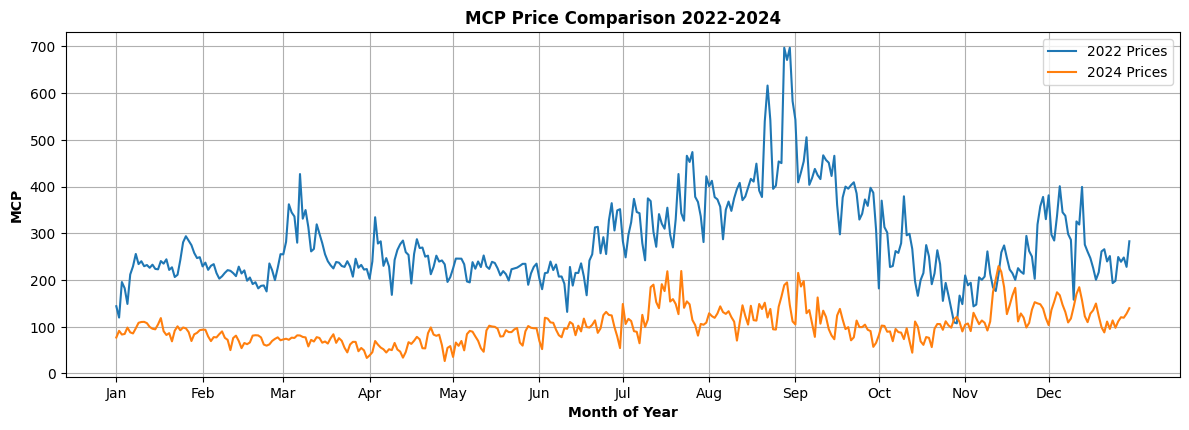

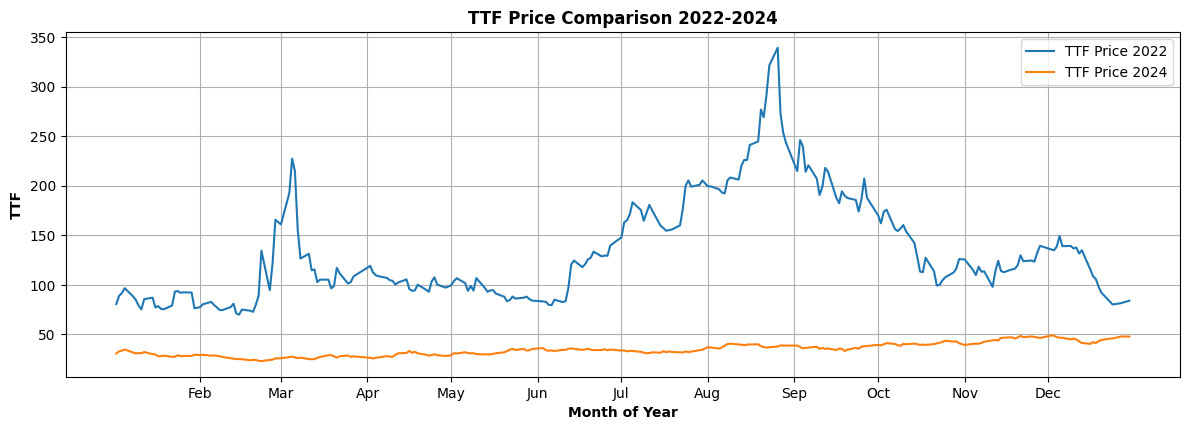

In [26]:
plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
plt.plot(df_mcp_full_1['MCP'], label='2022 Prices')
plt.plot(df_mcp_full_2['MCP'], label = '2024 Prices')

# plt.xticks(['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

#plt.xticks(ticks=df_mcp_full_1['month'], labels=df_mcp_full_1['month'])



plt.legend()
plt.grid()

# Set 12 evenly spaced ticks on the x-axis
#tick_positions = np.linspace(0, 350, 12)
#plt.xticks()

#plt.xticks(ticks=tick_positions)
#plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

month_starts = pd.date_range(start=df_mcp_full_1.index.min(), end=df_mcp_full_1.index.max(), freq='MS')
month_labels = month_starts.strftime('%b')
plt.xticks(ticks=month_starts, labels=month_labels)


plt.title("MCP Price Comparison 2022-2024", fontweight="bold")
plt.ylabel("MCP", fontweight="bold")
plt.xlabel("Month of Year", fontweight="bold")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,8))

plt.subplot(2,1,2)
plt.plot(df_ttf_full_1['TTF'], label="TTF Price 2022")
plt.plot(df_ttf_full_2['TTF'], label="TTF Price 2024")



month_starts = pd.date_range(start=df_ttf_full_1.index.min(), end=df_ttf_full_1.index.max(), freq='MS')
month_labels = month_starts.strftime('%b')
plt.xticks(ticks=month_starts, labels=month_labels)


plt.title("TTF Price Comparison 2022-2024", fontweight="bold")
plt.ylabel("TTF", fontweight="bold")
plt.xlabel("Month of Year", fontweight="bold")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()